In [5]:
import os, time
import numpy as np
import pickle

# Figures 
from specs import *
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.transforms

lbls_res = {
    "w_out_norm": r"$\|\mathbf{w}_\mathrm{out}\|$",
    "r_sq": r"$R^2$",
    "ridge_alpha": r"fit $\alpha$",
    "pr": r"PR",
    "D_90": r"$D_{90}$",
    "corr_w_x": r"Correlation $\rho$",
    "n_samples": r"\# samples",
    "dim_hid": r"\# neurons $N$",
    "d_var": r"$D_{x, 90}$", 
    "d_fit_rel": r"$D_{\mathrm{fit}, 90}$",
    "ratio_d_fit_var_rel": r"Rel. fitting dim.",
}


In [6]:
# Load reduced data for plotting
file_name = "data_corr_dims.pkl"
# file_name = "data_corr_dims_vel_only.pkl"
data_file = os.path.join(data_path, file_name)
with open(data_file, 'rb') as handle:
    res = pickle.load(handle)
    [
        dataset_supers, 
        results,
    ] = res
    del res
print("Loaded from %s" % data_file)

Loaded from ../data/data_corr_dims.pkl


In [7]:
# alpha_range = np.logspace(-3, 6, 20)
# print(alpha_range)

for key in results.keys():
    print("%35s, %6d, %.2f, %.1e, %.2f, %d" %(
    key, 
    results[key][0]['n_samples'], 
    results[key][0]["r_sq"], 
    results[key][0]['ridge_alpha'],
    results[key][0]['corr_w_x'],
    results[key][0]['d_fit_rel'],
   ))

              bci-golub_2018-before,    402, 1.00, 1.0e-03, 0.17, 18
             bci-hennig_2018-before,   3953, 1.00, 1.0e-03, 0.23, 2
          bci-degenhart_2020-before,   7573, 0.83, 3.4e+05, 0.23, 4
                   russo_2018_1-emg,   5865, 0.97, 6.2e+00, 0.04, 10
              russo_2018_1-hand_pos,   5865, 0.98, 2.1e+00, 0.03, 15
              russo_2018_1-hand_vel,   5865, 0.97, 2.1e+00, 0.04, 14
              russo_2018_1-hand_acc,   5865, 0.96, 1.6e+02, 0.07, 19
                   russo_2018_2-emg,   5550, 0.97, 2.1e+00, 0.04, 15
              russo_2018_2-hand_pos,   5550, 0.98, 1.8e+01, 0.09, 9
              russo_2018_2-hand_vel,   5550, 0.98, 6.2e+00, 0.07, 13
              russo_2018_2-hand_acc,   5550, 0.96, 6.2e+00, 0.05, 18
  nlb-mc_maze_large-hand_pos-single,   2723, 0.82, 4.3e+03, 0.13, 30
     nlb-mc_maze_large-hand_pos-tca,    189, 1.00, 2.1e+00, 0.08, 12
  nlb-mc_maze_large-hand_vel-single,   2723, 0.73, 4.3e+03, 0.13, 40
     nlb-mc_maze_large-hand_vel-tca, 


russo_2018_1-hand_vel corr_w_x 0.04
russo_2018_2-hand_vel corr_w_x 0.07
nlb-mc_rtt-finger_vel corr_w_x 0.13
nlb-mc_maze_large-hand_vel-single corr_w_x 0.13
bci-golub_2018-before corr_w_x 0.17
bci-hennig_2018-before corr_w_x 0.23
bci-degenhart_2020-before corr_w_x 0.23

russo_2018_1-hand_vel ratio_d_fit_var_rel 0.82
russo_2018_2-hand_vel ratio_d_fit_var_rel 0.72
nlb-mc_rtt-finger_vel ratio_d_fit_var_rel 0.37
nlb-mc_maze_large-hand_vel-single ratio_d_fit_var_rel 0.47
bci-golub_2018-before ratio_d_fit_var_rel 0.31
bci-hennig_2018-before ratio_d_fit_var_rel 0.03
bci-degenhart_2020-before ratio_d_fit_var_rel 0.06
Save figure to ../figures/data_corr_dim.both


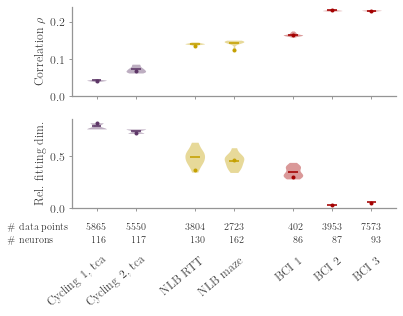

In [8]:

lbls_hl = ["Cycling", "NLB", "BCI"]
dataset_plt = {
    'russo_2018_1-hand_vel':             ("Cycling 1, tca", 4),
    'russo_2018_2-hand_vel':             ("Cycling 2, tca", 4), 
    'nlb-mc_rtt-finger_vel':             ("NLB RTT", 5),
    'nlb-mc_maze_large-hand_vel-single': ("NLB maze", 5),
    'bci-golub_2018-before':             ("BCI 1", 3),
    'bci-hennig_2018-before':            ("BCI 2", 3),
    'bci-degenhart_2020-before':         ("BCI 3", 3),
}

dataset_names_plt = list(dataset_plt.keys())
dataset_lbls, i_colors = np.array(list(dataset_plt.values())).T
i_colors = np.int_(i_colors)
xs = np.arange(0., len(dataset_names_plt))
xs[2:] = xs[2:] + 0.5
xs[4:] = xs[4:] + 0.5

y_keys = [
    "corr_w_x", 
    "ratio_d_fit_var_rel",  
]
n_cols = 1
n_rows = len(y_keys) // n_cols
fig = plt.figure(figsize=(4.5 * n_cols, 1.4 * n_rows), facecolor='w')
gs0 = GridSpec(n_rows, n_cols)
gs0.update(left=0., right=1., bottom=0., top=1., wspace=0.4, hspace=0.25)
axes = np.array([[fig.add_subplot(gs0[i_r, i_c])
                      for i_c in range(n_cols)] for i_r in range(n_rows)])

output_mods = np.array(["pos", "vel", "acc", "emg", "before", "after"])
m_mods = ['s', 'o', '>', '*', 'o', '<']
ms_mods = [5, 5, 5, 8, 5, 5]

for i_r, i_c in np.ndindex(n_rows, n_cols):
    print()
    ax = axes[i_r, i_c]
    i_y = i_r + i_c * n_rows
    
    for i_ds, dataset_name in enumerate(dataset_names_plt):
        xi = xs[i_ds]
        # Colors according to datasets
        i_co = i_colors[i_ds]
        c = colors[i_co]
        # Marker
        output_mod = dataset_name.split('-')[-1]
        if dataset_name.startswith("nlb-mc_maze"):
            output_mod = dataset_name.split('-')[-2]
        i_m = np.where([output_mod.endswith(opm) for opm in output_mods])[0][0]
        m = m_mods[i_m]
        ms = ms_mods[i_m]
        alpha = 1.
        
        # Results for full datasets
        y_key = y_keys[i_y]
        ys, ys_sub_t, _ = results[dataset_name]
        y = ys[y_key]
        y_sub = ys_sub_t[y_key]
            
        # Results for full dataset
        ax.plot(xi, y, 'o', ms=3, c=c, alpha=alpha, clip_on=True)
        
        # Print for the text.
        print(dataset_name, y_key, np.round(y, 2))
        # print(dataset_name, y_key, y_sub.mean())
        
        # Subsampled results
        width = 0.5
        violin_parts = ax.violinplot(y_sub, [xi], points=20, widths=width,
                      showmeans=True, showextrema=False, showmedians=False, )
        for vp in violin_parts['bodies']:
            vp.set_color(c)
            vp.set_facecolor(c)
            vp.set_edgecolor(c)
            vp.set_linewidth(0)
            vp.set_alpha(0.4)
        for partname in ('cbars','cmins','cmaxes','cmeans','cmedians',):
            if partname in violin_parts.keys():
                vp = violin_parts[partname]
                vp.set_edgecolor(c)
                vp.set_linewidth(2)
                vp.set_alpha(0.8)
                
        xlim = (xs[0]-0.625, xs[-1] + 0.625)
        ylim_corr = 0.24
        ylim_dim = 55
        if i_r == n_rows-1 and i_c == 0:
            ymax = 1
            xmax = 1
            y0 = ymax * -0.4
            dy = 0.14 * ymax
            x0 = (xi - xlim[0] + 0.25) / (xlim[1] - xlim[0])
            ax.text(x0, y0, ys['dim_hid'], ha='right', va='bottom', fontsize=10, rotation=0, transform=ax.transAxes)
            ax.text(x0, y0+dy, ys['n_samples'], ha='right', va='bottom', fontsize=10, rotation=0, transform=ax.transAxes)
            if i_ds == 0:
                x = -0.2
                ax.text(x, y0, "\# neurons", ha='left', va='bottom', fontsize=10, transform=ax.transAxes)
                ax.text(x, y0+dy, "\# data points", ha='left', va='bottom', fontsize=10, transform=ax.transAxes)
    
    ax.set_ylim(0, )
    lbl = lbls_res[y_key]
    if y_key in ["r_sq"]:
        ax.set_ylim(0, 1.05)
    if y_key == "corr_w_x":
        ax.set_ylim(0, ylim_corr)
    if y_key in ["d_var", "d_fit_rel"]:
        # ax.set_ylim(0, 55)
        pass
    if y_key == "ratio_d_fit_var_rel":
        ax.set_ylim(0, )
    ax.set_ylabel(lbl)
    ax.set_xticks(xs)
    if i_r == n_rows - 1:
        ax.set_xticklabels(dataset_lbls, rotation=40, ha='right')
        
        # Apply offset transform to all x ticklabels.
        # Create offset transform by 5 points in x direction
        dx = 0.15; dy = -0.55
        offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
        for label in ax.xaxis.get_majorticklabels():
            label.set_transform(label.get_transform() + offset)
    else:
        ax.set_xticklabels([])
fig.align_ylabels(axes[:, 0])

fig_name = "data_corr_dim"
saving_fig(fig, figure_path, fig_name, data_type='both')

Save figure to ../figures/data_corr_dim_scale.both


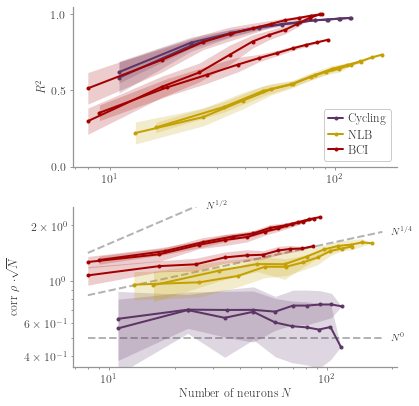

In [9]:
# Plot scaling of correlation with network size
y_keys = ["r_sq", "corr_w_x", ]
normalize_corr = True

n_cols = 1
n_rows = len(y_keys) // n_cols
fig = plt.figure(figsize=(4.5 * n_cols, 2.5 * n_rows), facecolor='w')
gs0 = GridSpec(n_rows, n_cols)
gs0.update(left=0., right=1., bottom=0., top=1., wspace=0.4, hspace=0.25)
axes = np.array([[fig.add_subplot(gs0[i_r, i_c])
                      for i_c in range(n_cols)] for i_r in range(n_rows)])


for i_r, i_c in np.ndindex(n_rows, n_cols):
    ax = axes[i_r, i_c]
    i_y = i_r + i_c * n_rows
    y_key = y_keys[i_y]

    for i_ds, dataset_name in enumerate(dataset_names_plt):
        xi = xs[i_ds]
        # Colors according to datasets
        i_co = i_colors[i_ds]
        c = colors[i_co]
        # Marker
        output_mod = dataset_name.split('-')[-1]
        if dataset_name.startswith("nlb-mc_maze"):
            output_mod = dataset_name.split('-')[-2]

        ys, ys_sub_t, ys_sub_n = results[dataset_name]
        y = ys[y_key]

        try:
            y_sub = ys_sub_n[y_key]
        except:
            lbls_res_n = ["r_sq", "ridge_alpha", "w_out_norm", "corr_w_x", "pr",
                       ]
            ys_sub_n = {lbls_res_n[i]: res_sub for i, res_sub in enumerate(ys_sub_n)}
            y_sub = ys_sub_n[y_key]
            
            
        dim_hid = ys["dim_hid"]
        frac_dim_hids = np.linspace(0.1, 1., 10)
        dim_hid_subs = np.int_(dim_hid * frac_dim_hids)
        x = dim_hid_subs
        
        if y_key in ["r_sq"]:
            ax.set_ylim(0, 1.05)
        if y_key == "corr_w_x":
            if normalize_corr:
                y = y / np.sqrt(1 / dim_hid)
                y_sub = y_sub / np.sqrt(1 / dim_hid_subs)

        if i_ds in [0, 3, 6]:
            i_lbl = np.where(i_ds == np.array([0, 3, 6]))[0][0]
            lbl = lbls_hl[i_lbl]
        else:
            lbl = None
        plot_samples(ax, x, y_sub, 'o-', c=c, label=lbl)

        if y_key == "corr_w_x" and i_ds == 0: #and normalize_corr:
            # For comparison: 
            x = np.linspace(8, 180, 200)
            for i in range(3):
                if normalize_corr:
                    ymax = 2.5
                    p = [0., 1/4, 1/2][i]
                    p_lbl = ["0", "1/4", "1/2"][i]
                else:
                    ymax = 1
                    p = [0., -1/4, -1/2][i]
                    p_lbl = ["0", "-1/4", "-1/2"][i]
                b = 2
                y = x**p / b
                ax.plot(x, y, ls='--', c=c_leg, zorder=-1)
                i_t = np.argmin((y - ymax)**2) if p > 0 else -1
                ax.text(x[i_t]*1.1, y[i_t], "$N^{%s}$" % p_lbl, va='center')
                
        if i_r == 0:
            ax.legend(loc=4, ncol=1, 
                labelspacing=0.4, handlelength=1.2, handletextpad=0.4, columnspacing=0.5,
                frameon=True, framealpha=1., markerscale=1,
                bbox_to_anchor=(1, 0)
                         )

        lbl = lbls_res[y_key]
        if y_key in ["r_sq"]:
            ax.set_ylim(0, 1.05)
            ax.set_yticks([0, 0.5, 1])
        if y_key == "corr_w_x":# and normalize_corr:
            if normalize_corr:
                lbl = r"corr $\rho$ $\cdot \sqrt{N}$"
            ax.set_yscale('log')
            if normalize_corr:
                ax.set_ylim(0.35, ymax)
            else:
                ax.set_ylim(0.02, ymax)
            # ax.set_ylim(0., ymax)
        ax.set_ylabel(lbl)

        # ax.set_ylim(0.2, 2.5)
        if i_r == n_rows-1:
            ax.set_xlabel("Number of neurons $N$")
        ax.set_xscale('log')

fig_name = "data_corr_dim_scale"
saving_fig(fig, figure_path, fig_name, data_type='both')

Loaded from ../data/data_corr_dims.pkl
Save figure to ../figures/data_corr_dims_all.both


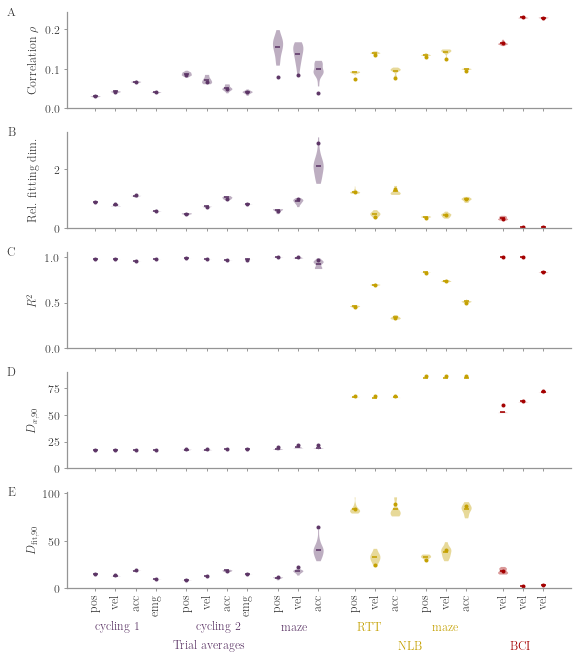

In [10]:
# Plot results for all modalitities

file_name = "data_corr_dims.pkl"
data_file = os.path.join(data_path, file_name)
with open(data_file, 'rb') as handle:
    res = pickle.load(handle)
    [
        dataset_supers, 
        results,
    ] = res
    del res
print("Loaded from %s" % data_file)


dataset_plt = {
    'russo_2018_1-hand_pos':             ("pos", 4),
    'russo_2018_1-hand_vel':             ("vel", 4),
    'russo_2018_1-hand_acc':             ("acc", 4),
    'russo_2018_1-emg':                  ("emg", 4),
    'russo_2018_2-hand_pos':             ("pos", 4), 
    'russo_2018_2-hand_vel':             ("vel", 4), 
    'russo_2018_2-hand_acc':             ("acc", 4), 
    'russo_2018_2-emg':                  ("emg", 4), 
    'nlb-mc_maze_large-hand_pos-tca':    ("pos", 4),
    'nlb-mc_maze_large-hand_vel-tca':    ("vel", 4),
    'nlb-mc_maze_large-hand_acc-tca':    ("acc", 4),
    'nlb-mc_rtt-finger_pos':             ("pos", 5),
    'nlb-mc_rtt-finger_vel':             ("vel", 5),
    'nlb-mc_rtt-finger_acc':             ("acc", 5),
    'nlb-mc_maze_large-hand_pos-single': ("pos", 5),
    'nlb-mc_maze_large-hand_vel-single': ("vel", 5),
    'nlb-mc_maze_large-hand_acc-single': ("acc", 5),
    'bci-golub_2018-before':             ("vel", 3),
    'bci-hennig_2018-before':            ("vel", 3),
    'bci-degenhart_2020-before':         ("vel", 3),
}
dataset_names_plt = list(dataset_plt.keys())
ds_lbls, i_colors = np.array(list(dataset_plt.values())).T
i_colors = np.int_(i_colors)

y_keys = [
          "corr_w_x", 
          "ratio_d_fit_var_rel",
          "r_sq", 
          "d_var", 
          "d_fit_rel", 
         ]
n_rows = len(y_keys)
n_cols = 1
fig = plt.figure(figsize=(7.0 * n_cols, 1.6 * n_rows), facecolor='w')
gs0 = GridSpec(n_rows, n_cols)
gs0.update(left=0., right=1., bottom=0., top=1., wspace=0.2, hspace=0.25)
axes = np.array([[fig.add_subplot(gs0[i_r, i_c])
                      for i_c in range(n_cols)] for i_r in range(n_rows)])

output_mods = np.array(["pos", "vel", "acc", "emg", "before", "after"])
m_mods = ['s', 'o', '>', '*', 'o', '<']
ms_mods = [5, 5, 5, 8, 5, 5]

for i_r, i_c in np.ndindex(n_rows, n_cols):
    ax = axes[i_r, i_c]
    i_y = i_r + i_c * n_rows
    
    # Normalize correlations?
    normalize_corr = i_r == 2
    
    xs = np.arange(0., len(dataset_names_plt))
    xs[4:] = xs[4:] + 0.5
    xs[8:] = xs[8:] + 0.5
    xs[11:] = xs[11:] + 0.8
    xs[14:] = xs[14:] + 0.5
    xs[17:] = xs[17:] + 0.8
    for i_ds, dataset_name in enumerate(dataset_names_plt):
        xi = xs[i_ds]
        # Colors according to datasets
        i_co = i_colors[i_ds]
        c = colors[i_co]
        # Marker
        output_mod = dataset_name.split('-')[-1]
        if dataset_name.startswith("nlb-mc_maze"):
            output_mod = dataset_name.split('-')[-2]
        i_m = np.where([output_mod.endswith(opm) for opm in output_mods])[0][0]
        m = m_mods[i_m]
        ms = ms_mods[i_m]
        alpha = 1.
        
        y_key = y_keys[i_y]
        ys, ys_sub, _ = results[dataset_name]
        y = ys[y_key]
        y_sub = ys_sub[y_key]
        if y_key == "corr_w_x" and normalize_corr:
            y = y / np.sqrt(1 / ys['dim_hid'])
            y_sub = y_sub / np.sqrt(1 / ys['dim_hid'])
            
        # # Results for full datasets
        ax.plot(xi, y, 'o', ms=3, c=c, alpha=alpha)
        
        # Subsampled results
        width = 0.5
        violin_parts = ax.violinplot(y_sub, [xi], points=20, widths=width,
                      showmeans=True, showextrema=False, showmedians=False, )
        for vp in violin_parts['bodies']:
            vp.set_color(c)
            vp.set_facecolor(c)
            vp.set_edgecolor(c)
            vp.set_linewidth(0)
            vp.set_alpha(0.4)
        for partname in ('cbars','cmins','cmaxes','cmeans','cmedians',):
            if partname in violin_parts.keys():
                vp = violin_parts[partname]
                vp.set_edgecolor(c)
                vp.set_linewidth(2)
                vp.set_alpha(0.8)
        
    
    lbl = lbls_res[y_key]
    ax.set_ylim(0, )
    if y_key in ["r_sq"]:
        ax.set_ylim(0, 1.05)
    if y_key == "corr_w_x":
        if normalize_corr:
            ax.axhline(1, ls='--', c=c_leg, zorder=-1, alpha=0.5)
            lbl = r"corr $\rho$ $\cdot \sqrt{N}$"
    ax.set_ylabel(lbl) 
        
    ax.set_xticks(xs)
    if i_r == n_rows - 1:
        ax.set_xticklabels(ds_lbls, rotation=90, ha='center')
        xls = np.array([0.28, 0.68, 0.9])
        lbls = [
            "Trial averages",
            "NLB", 
            "BCI", 
        ]
        for i, xl in enumerate(xls):
            y0 = -0.55
            i_co = i + 1 * (i>0)
            i_co = [4, 5, 3][i]
            ax.text(xl, y0, lbls[i], color=colors[i_co], ha='center', va='top', fontsize=fs, transform=ax.transAxes)
        xls = np.array([0.1, 0.3, 0.45, 0.6, 0.75])
        lbls = [
                "cycling 1", "cycling 2",
                "maze", 
                "RTT", "maze", 
               ]
        for i, xl in enumerate(xls):
            y0 = -0.35
            i_co = [4, 4, 4, 5, 5][i]
            ax.text(xl, y0, lbls[i], color=colors[i_co], ha='center', va='top', fontsize=fs, transform=ax.transAxes)
    else:
        ax.set_xticklabels([])
        
fig.align_ylabels(axes[:, 0])

# Label plots
for i_r, i_c in np.ndindex(n_rows, n_cols):
    ax = axes[i_r, i_c]
    i = i_r + i_c * n_rows
    xpos = [-0.11, -0.13][i_c]
    ypos = 0.95
    ax.text(xpos, ypos, flbs[i], fontsize=fs, ha='center', va='bottom', transform=ax.transAxes)
    
fig_name = "data_corr_dims_all"
saving_fig(fig, figure_path, fig_name, data_type='both')